$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 5 $$

# `01` Assignment 01

- Design your LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Use $80\%$ of the provided training data for training and $20\%$ for validation (Keep the test data for testing after training).
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.


  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

import os
import sys
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
# import the MNIST dataset
from tensorflow import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import tensorflow as tf

# LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, ConvLSTM1D, Reshape


2025-04-20 01:19:02.328329: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-20 01:19:02.650671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745104742.840472    4022 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745104742.893712    4022 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745104743.120787    4022 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [4]:
import tensorflow as tf

# `+` Seed Value

In [5]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

**Reminder:** You might need rescaling, and/or other preprocessing methods.

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# 80 % of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

In [7]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (48000, 28, 28)
Shape of y_train: (48000,)
Shape of X_test: (12000, 28, 28)
Shape of y_test: (12000,)


In [8]:
# try to_categorical one hot encoding from keras instead of one hot encoding from sklearn
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
# SCALE THE DATA
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

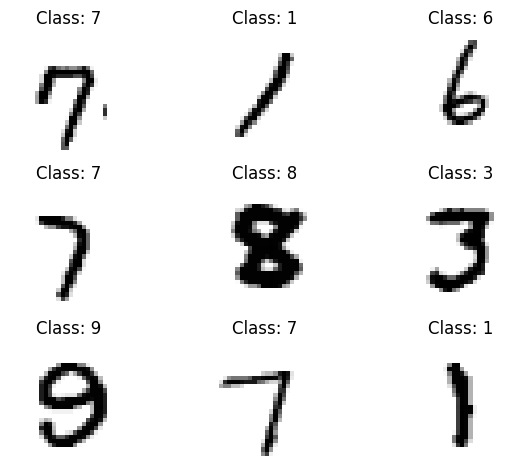

In [10]:
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title(f'Class: {np.argmax(y_train[i])}')
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(X_train[i], cmap=plt.cm.binary) 


## `+` Set Global Parameters

In [14]:
BATCH_SIZE  = 32
EPOCHS      = 20

## `i` Model Design

In [15]:
model = Sequential()
model.add(LSTM(32, input_shape=(28, 28), recurrent_dropout=0.15))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

## `ii` Model Compilation & Training

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# fit the model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 186s 150ms/step - accuracy: 0.5177 - loss: 1.4134 - val_accuracy: 0.8801 - val_loss: 0.3965
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 189s 157ms/step - accuracy: 0.8571 - loss: 0.4590 - val_accuracy: 0.9326 - val_loss: 0.2366
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 186s 155ms/step - accuracy: 0.9049 - loss: 0.3079 - val_accuracy: 0.9475 - val_loss: 0.1773
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 181s 151ms/step - accuracy: 0.9270 - loss: 0.2411 - val_accuracy: 0.9573 - val_loss: 0.1475
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 177s 147ms/step - accuracy: 0.9392 - loss: 0.2044 - val_accuracy: 0.9632 - val_loss: 0.1258
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 206s 171ms/step - accuracy: 0.9470 - loss: 0.1748 - val_accuracy: 0.9664 - val_loss: 0.1122
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 207s 173ms/step - accuracy: 0.9515 - loss: 0.1565 - val_accuracy: 0.9663 - val_loss: 0.1109
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 208s 174ms/step - ac

## `iii` Model Evaluation

In [19]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Test loss: 0.06282932311296463
Test accuracy: 0.9816666841506958


## `iv` Result Visualization

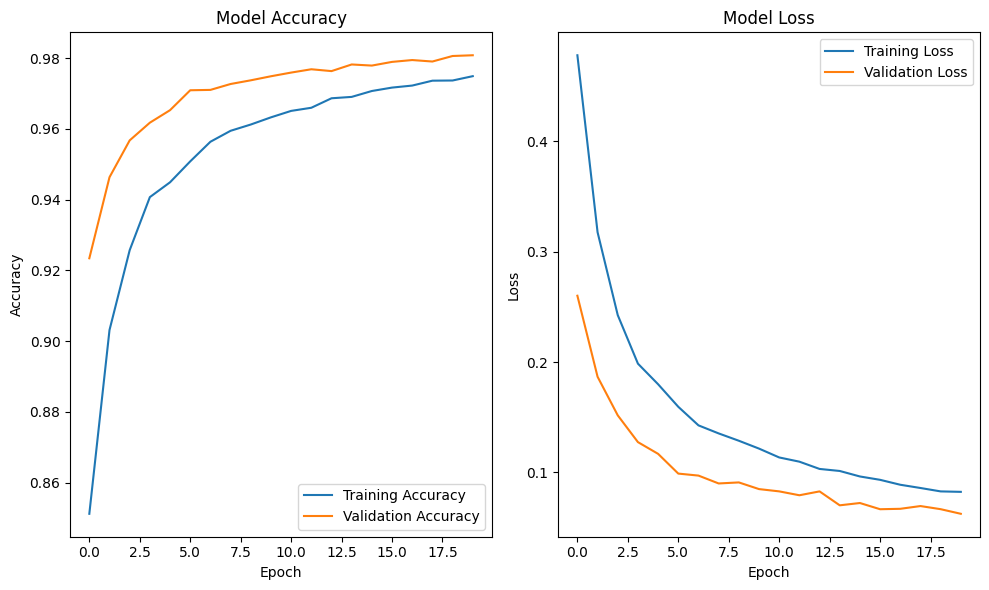

In [26]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


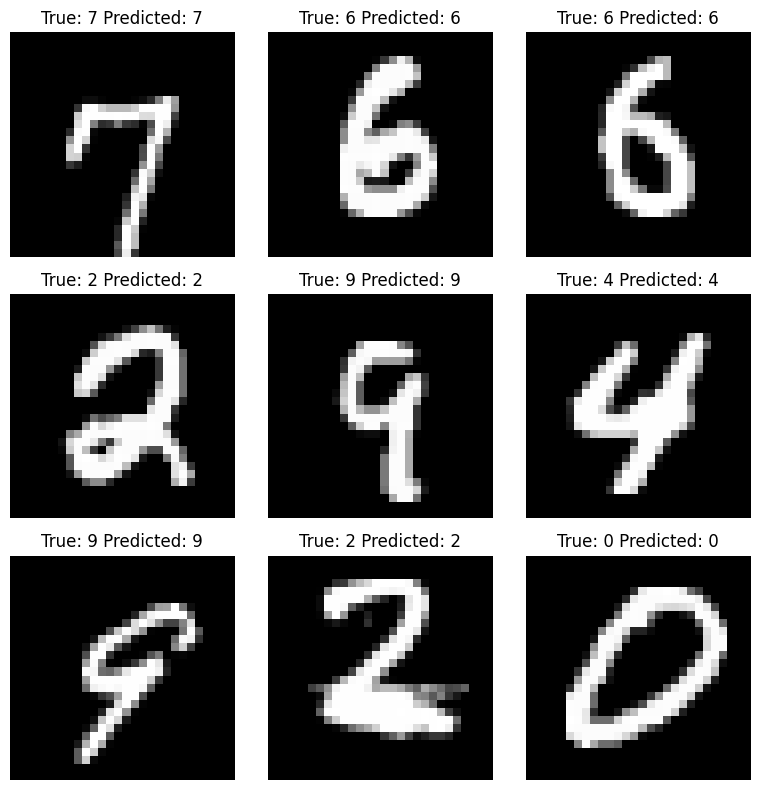

In [32]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title(f'True: {np.argmax(y_test[i])} Predicted: {np.argmax(model.predict(X_test[i].reshape(1, 28, 28)))}')
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(X_test[i], cmap='gray')

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


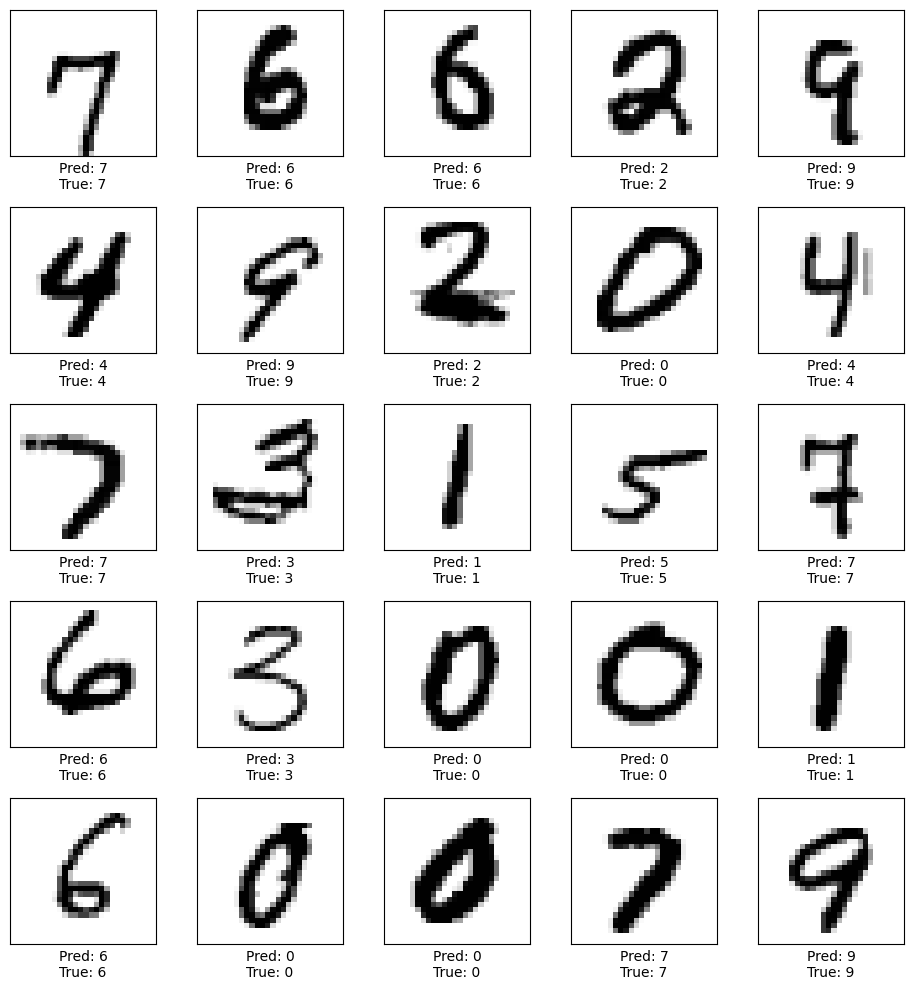

In [33]:
# Predict the classes of the test samples
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot some of the test samples along with their predicted and true classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred_classes[i]}\nTrue: {y_true[i]}")
    plt.tight_layout()
plt.show()

**Note:** You can add more trials and explore different hyperparameters and design decisions as you want.

------------------------------

# Assignment 02
- Repeat assignment `01` using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions. Read more [here](https://paperswithcode.com/method/convlstm) and [here](https://medium.com/neuronio/an-introduction-to-convlstm-55c9025563a7).
- Use the same parameters from assignment `01` in addition to:
  - Kernel Size -> Try $1$ and $3$. Which is better?
  - Padding = `same` or `valid` -> Is there a big difference?

**Note:** You might need to reshape the input (Hint: check `keras.layers.Reshape` layer)


IMPORTANT NOTE: Make sure to organize your solution, add proper documentation, and report your insights.
------------------------------

In [14]:
model_2 = Sequential()
model_2.add(LSTM(32, input_shape=(28, 28), recurrent_dropout=0.15))
model_2.add(Dense(10, activation='softmax'))
model_2.add(Dropout(0.5))
model_2.add(Flatten())


In [15]:
# Parameters
kernel_size = 3   # Try 1 and 3
padding = 'same'  # Try 'same' and 'valid'

model = Sequential()

# Reshape input from (28, 28) to (28, 28, 1) -> time steps, features, channels
model.add(Reshape((28, 28, 1), input_shape=(28, 28)))

# ConvLSTM1D layer
model.add(ConvLSTM1D(
    filters=32,
    kernel_size=kernel_size,
    padding=padding,
    return_sequences=False,
    dropout=0.0,
    recurrent_dropout=0.15
))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d (ConvLSTM1D)        │ (None, 28, 32)         │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         8,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,770 (85.04 KB)

 Trainable params: 21,770 (85.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

Epoch 1/20


I0000 00:00:1745103057.889164    5244 service.cc:152] XLA service 0x7ff6181f56a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745103057.889220    5244 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-04-20 00:50:58.091960: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745103058.878275    5244 cuda_dnn.cc:529] Loaded cuDNN version 90300


   3/1200 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - accuracy: 0.1076 - loss: 2.2942   

I0000 00:00:1745103070.391254    5244 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7097 - loss: 0.8890 - val_accuracy: 0.9323 - val_loss: 0.2124
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 42ms/step - accuracy: 0.9212 - loss: 0.2470 - val_accuracy: 0.9590 - val_loss: 0.1336
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 41ms/step - accuracy: 0.9484 - loss: 0.1604 - val_accuracy: 0.9686 - val_loss: 0.1002
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 41ms/step - accuracy: 0.9623 - loss: 0.1233 - val_accuracy: 0.9754 - val_loss: 0.0802
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 42ms/step - accuracy: 0.9682 - loss: 0.0987 - val_accuracy: 0.9663 - val_loss: 0.1095
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 42ms/step - accuracy: 0.9694 - loss: 0.0911 - val_accuracy: 0.9774 - val_loss: 0.0721
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 48s 40ms/step - accuracy: 0.9755 - loss: 0.0780 - val_accuracy: 0.9820 - val_loss: 0.0581
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9788 - loss: 0.06

In [18]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Test loss: 0.04413093626499176
Test accuracy: 0.987500011920929


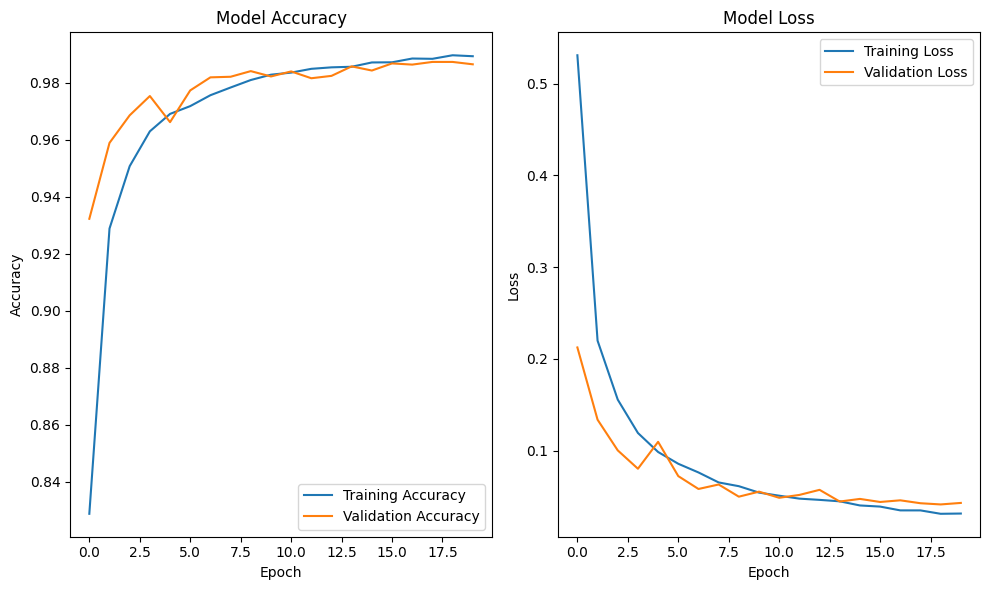

In [19]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


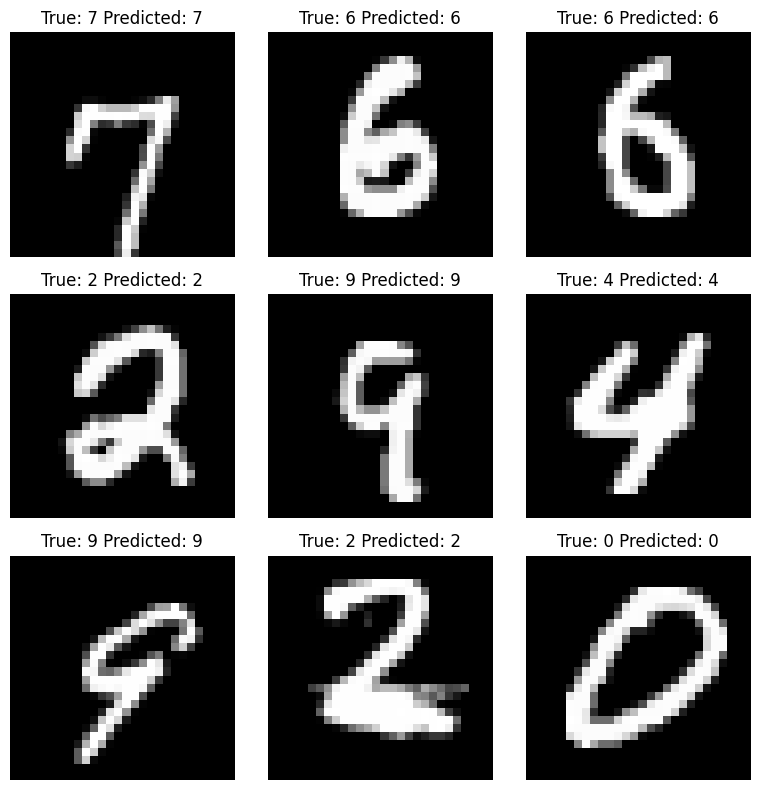

In [53]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title(f'True: {np.argmax(y_test[i])} Predicted: {np.argmax(model.predict(X_test[i].reshape(1, 28, 28)))}')
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(X_test[i], cmap='gray')

In [20]:
# Parameters
kernel_size = 1   # Try 1 and 3
padding = 'same'  # Try 'same' and 'valid'

model = Sequential()

# Reshape input from (28, 28) to (28, 28, 1) -> time steps, features, channels
model.add(Reshape((28, 28, 1), input_shape=(28, 28)))

# ConvLSTM1D layer
model.add(ConvLSTM1D(
    filters=32,
    kernel_size=kernel_size,
    padding=padding,
    return_sequences=False,
    dropout=0.0,
    recurrent_dropout=0.15
))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_1 (ConvLSTM1D)      │ (None, 28, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         8,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,322 (52.04 KB)

 Trainable params: 13,322 (52.04 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7974 - loss: 0.6519 - val_accuracy: 0.8933 - val_loss: 0.3354
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8875 - loss: 0.3517 - val_accuracy: 0.9258 - val_loss: 0.2395
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9160 - loss: 0.2747 - val_accuracy: 0.9401 - val_loss: 0.1937
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9293 - loss: 0.2263 - val_accuracy: 0.9451 - val_loss: 0.1786
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9371 - loss: 0.2038 - val_accuracy: 0.9456 - val_loss: 0.1656
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9476 - loss: 0.1704 - val_accuracy: 0.9542 - val_loss: 0.1496
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9468 - loss: 0.1668 - val_accuracy: 0.9590 - val_loss: 0.1344
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9534 -

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [60]:
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Test loss: 0.10807366669178009
Test accuracy: 0.9680833220481873


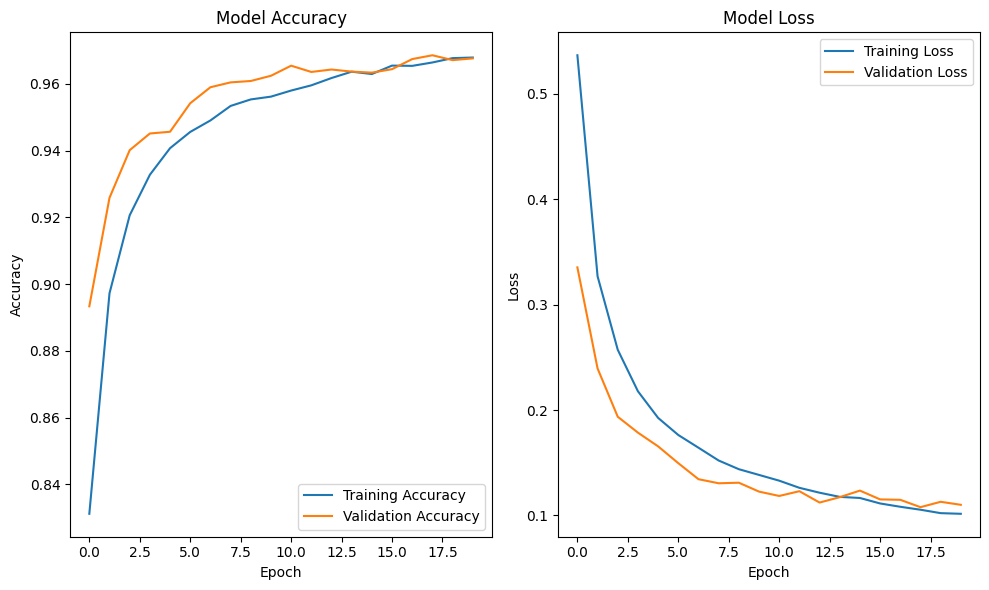

In [59]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy is reduced when tried the same padding with the kernal = 1
- so kernal size have alot of impact 

In [12]:
# Parameters
kernel_size = 3   # Try 1 and 3
padding = 'valid'  # Try 'same' and 'valid'

model = Sequential()

# Reshape input from (28, 28) to (28, 28, 1) -> time steps, features, channels
model.add(Reshape((28, 28, 1), input_shape=(28, 28)))

# ConvLSTM1D layer
model.add(ConvLSTM1D(
    filters=32,
    kernel_size=kernel_size,
    padding=padding,
    return_sequences=False,
    dropout=0.0,
    recurrent_dropout=0.15
))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test loss: {loss}")

print(f"Test accuracy: {accuracy}")

I0000 00:00:1745104782.760780    4022 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4269 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d (ConvLSTM1D)        │ (None, 26, 32)         │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 832)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         8,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,130 (82.54 KB)

 Trainable params: 21,130 (82.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1745104789.864910    4386 service.cc:152] XLA service 0x77f8180d5790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745104789.864950    4386 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-04-20 01:19:50.153255: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745104790.717339    4386 cuda_dnn.cc:529] Loaded cuDNN version 90300


   7/1200 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.1413 - loss: 2.3191 

I0000 00:00:1745104802.192188    4386 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.6661 - loss: 0.9823 - val_accuracy: 0.9373 - val_loss: 0.2000
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 40ms/step - accuracy: 0.9229 - loss: 0.2408 - val_accuracy: 0.9571 - val_loss: 0.1344
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 48s 40ms/step - accuracy: 0.9458 - loss: 0.1672 - val_accuracy: 0.9678 - val_loss: 0.0984
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9603 - loss: 0.1288 - val_accuracy: 0.9698 - val_loss: 0.0908
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 47s 39ms/step - accuracy: 0.9669 - loss: 0.1097 - val_accuracy: 0.9771 - val_loss: 0.0739
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9715 - loss: 0.0921 - val_accuracy: 0.9809 - val_loss: 0.0614
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9743 - loss: 0.0805 - val_accuracy: 0.9772 - val_loss: 0.0720
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9773 - loss: 0.07

In [13]:
# Parameters
kernel_size = 1   # Try 1 and 3
padding = 'valid'  # Try 'same' and 'valid'

model = Sequential()

# Reshape input from (28, 28) to (28, 28, 1) -> time steps, features, channels
model.add(Reshape((28, 28, 1), input_shape=(28, 28)))

# ConvLSTM1D layer
model.add(ConvLSTM1D(
    filters=32,
    kernel_size=kernel_size,
    padding=padding,
    return_sequences=False,
    dropout=0.0,
    recurrent_dropout=0.15
))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test loss: {loss}")

print(f"Test accuracy: {accuracy}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_1 (ConvLSTM1D)      │ (None, 28, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,322 (52.04 KB)

 Trainable params: 13,322 (52.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.5819 - loss: 1.2298 - val_accuracy: 0.8642 - val_loss: 0.4091
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 52s 43ms/step - accuracy: 0.8708 - loss: 0.4057 - val_accuracy: 0.9096 - val_loss: 0.2806
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 42ms/step - accuracy: 0.9059 - loss: 0.3005 - val_accuracy: 0.9295 - val_loss: 0.2268
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 51s 43ms/step - accuracy: 0.9200 - loss: 0.2526 - val_accuracy: 0.9411 - val_loss: 0.1890
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9322 - loss: 0.2228 - val_accuracy: 0.9515 - val_loss: 0.1660
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9394 - loss: 0.1978 - val_accuracy: 0.9436 - val_loss: 0.1796
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 45s 37ms/step - accuracy: 0.9441 - loss: 0.1825 - val_accuracy: 0.9500 - val_loss: 0.1624
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 52s 43ms/step - accuracy: 0.9459 -

# 🔍 Comparison of ConvLSTM1D Settings

This file compares 4 conditions using different combinations of `kernel_size` and `padding` in a ConvLSTM1D layer.

---

## ✅ Condition 1: `kernel_size=1`, `padding='valid'`

- **Explanation**:
  - Looks at 1 time step only.
  - No padding → border information is lost because of valid (output size < input size).

- **Pros**:
  - Fastest setup.
  - Low memory usage.

- **Cons**:
  - Very limited context → weak for pattern learning.
  - so lower accuracy 

---

## ✅ Condition 2: `kernel_size=3`, `padding='valid'`

- **Explanation**:
  - Looks at 3 time steps (short patterns).
  - No padding → input size reduces, edge data is lost.

- **Pros**:
  - Better context than kernel=1.
  - Focuses on central patterns.
  - Slightly higher accuracy than kernal =1

- **Cons**:
  - Misses edge information.
  - Slightly slower than kernel=1.
  

---

## ✅ Condition 3: `kernel_size=1`, `padding='same'`

- **Explanation**:
  - Still looks at only 1 time step.
  - Adds padding → keeps output size same as input(same).

- **Pros**:
  - Fast and keeps full input shape.
  - Preserves edge data.

- **Cons**:
  - Still weak for pattern learning due to small kernel.

---

## ✅ Condition 4: `kernel_size=3`, `padding='same'`

- **Explanation**:
  - Looks at short time patterns.
  - Padding keeps output size the same.

- **Pros**:
  - Best for learning.
  - Sees local context and includes edge information.

- **Cons**:
  - Slowest among all.
  - Slightly higher memory usage.

---




## 📊 Summary Table

| Condition       | Speed      | Learning Power | Keeps Size? | Edge Info |
|----------------|------------|----------------|-------------|-----------|
| `1 + valid`     | ✅✅ Fastest | ❌ Weak         | ❌ No       | ❌ No     |
| `3 + valid`     | ✅ Fast      | ✅ Good         | ❌ No       | ❌ No     |
| `1 + same`      | ✅ Fast      | ❌ Weak         | ✅ Yes      | ✅ Yes    |
| `3 + same`      | ❌ Slowest  | ✅✅ Best        | ✅ Yes      | ✅ Yes    |

---

> 🔧 Choose based on your goal:
> - Need speed? → `kernel=1`, `padding=valid`
> - Need accuracy? → `kernel=3`, `padding=same`

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$